# Analysis and Visualization

## Importing Libraries and Loading the Graph

### Load the libraries


In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from IPython.display import clear_output
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pickle

### Load the saved graph

In [2]:
with open('graph.pickle', 'rb') as file:
    G = pickle.load(file)

## Analysis and Visualization
This part performs analysis on the created graph, including finding the number of connected components and plotting the degree distribution.
It also visualizes the graph using the nx.draw_networkx function from the networkx library.

### Basic network statistics
Calculate the number of nodes, edges, and average degree

In [3]:
n_nodes = G.number_of_nodes()
n_edges = G.number_of_edges()
avg_degree = np.mean([deg for _, deg in G.degree()])
print('Number of nodes:', n_nodes)
print('Number of edges:', n_edges)
print('Average degree:', avg_degree)

Number of nodes: 10505
Number of edges: 34858
Average degree: 6.636458829128986


### Connected components

In [4]:
n_connected = nx.number_connected_components(G)
print(f"The graph has {n_connected} connected components.")

The graph has 278 connected components.


### Shortest paths

In [5]:
main_artist = "Ed Sheeran"
target_node = input("Enter the target node: ")

try:
    shortest_path = nx.shortest_path(G, source=main_artist, target=target_node)
    shortest_path_length = nx.shortest_path_length(G, source=main_artist, target=target_node)
    
    if shortest_path_length == 1:
        print(main_artist, "and", target_node, "are directly connected.")
    else:
        shortest_path = shortest_path[1:-1]
        print("Length of the shortest path:", shortest_path_length)
        print("Shortest path between", main_artist, "and", target_node, ":")
        for node in shortest_path:
            print(node)

except nx.exception.NodeNotFound as e:
    print("The target", {target_node},"not in the graph")

except nx.exception.NetworkXNoPath:
    print("There is no path between", main_artist, "and", target_node)

Enter the target node: Cardi B
Length of the shortest path: 3
Shortest path between Ed Sheeran and Cardi B :
Camila Cabello
Silk Sonic


### Degree distribution

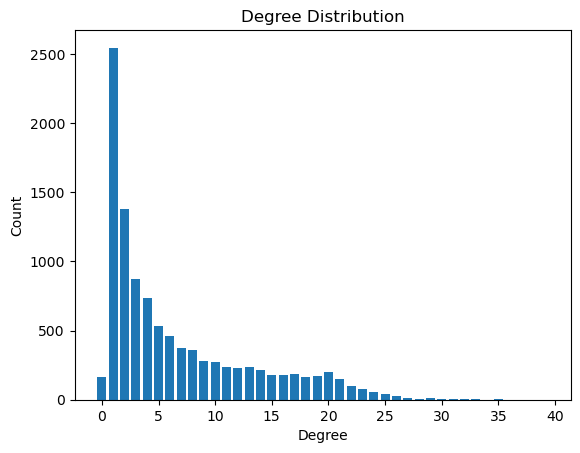

In [6]:
degree_hist = nx.degree_histogram(G)
degrees = range(len(degree_hist))
counts = degree_hist
plt.bar(degrees, counts)
plt.xlabel('Degree')
plt.ylabel('Count')
plt.title('Degree Distribution')
plt.show()

### Node Importance and Similarity Detection

#### Betweenness centrality

In [7]:
betweenness_centrality = nx.betweenness_centrality(G)
sorted_betweenness = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)
top_10_betweenness = sorted_betweenness[:10]
print('Top 10 nodes by betweenness centrality:')
for node, centrality in top_10_betweenness:
    print(node, centrality)

Top 10 nodes by betweenness centrality:
Plan B 0.044025532039277566
Christian Nodal 0.03472958232306505
Ricky Martin 0.03238873610399979
Alvaro Soler 0.030913581791784685
Reyli Barba 0.029678407396859657
FIFA Sound 0.028869262720986805
Bradley Cooper 0.028252149061994594
K'NAAN 0.025771060869326262
Funk Wav 0.02554227837109686
Ryan Gosling 0.023868704670676467


#### Degree centrality


In [15]:
degree_centrality = nx.degree_centrality(G)
sorted_degree = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)
top_10_degree = sorted_degree[:10]
print('\nTop 10 nodes by degree centrality:')
for node, centrality in top_10_degree:
    print(node, centrality)


Top 10 nodes by degree centrality:
Kelly Rowland 0.003712871287128713
Alessia Cara 0.0035224676313785224
Jessie J 0.0034272658035034275
Mýa 0.003332063975628332
Ella Henderson 0.003332063975628332
Fergie 0.003332063975628332
Ciara 0.003141660319878142
Charlotte Lawrence 0.003141660319878142
Mario 0.003141660319878142
Rita Ora 0.003141660319878142


#### Closeness centrality


In [16]:
closeness_centrality = nx.closeness_centrality(G)
sorted_closeness = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)
top_10_closeness = sorted_closeness[:10]
print('\nTop 10 nodes by closeness centrality:')
for node, centrality in top_10_closeness:
    print(node, centrality)


Top 10 nodes by closeness centrality:
Jessie J 0.15190459584089475
Ella Henderson 0.15135114873890215
Emeli Sandé 0.15102041199208507
Gwen Stefani 0.1506045426403625
Ellie Goulding 0.15003681808750252
Sam Smith 0.14976193335154112
The Wanted 0.14970884615407112
Rita Ora 0.14963517634157897
Adele 0.14949393335281952
James Bay 0.14947629672534465


### Community Detection

In [17]:
communities = list(nx.community.greedy_modularity_communities(G))
print('\nNumber of communities:', len(communities))
print('Community sizes:')
for i, community in enumerate(communities):
    print('Community', i+1, ':', len(community))


Number of communities: 335
Community sizes:
Community 1 : 2074
Community 2 : 1723
Community 3 : 699
Community 4 : 514
Community 5 : 486
Community 6 : 381
Community 7 : 362
Community 8 : 335
Community 9 : 317
Community 10 : 299
Community 11 : 215
Community 12 : 200
Community 13 : 199
Community 14 : 178
Community 15 : 128
Community 16 : 124
Community 17 : 86
Community 18 : 80
Community 19 : 80
Community 20 : 78
Community 21 : 61
Community 22 : 58
Community 23 : 54
Community 24 : 52
Community 25 : 49
Community 26 : 49
Community 27 : 47
Community 28 : 44
Community 29 : 42
Community 30 : 36
Community 31 : 35
Community 32 : 34
Community 33 : 32
Community 34 : 30
Community 35 : 30
Community 36 : 27
Community 37 : 27
Community 38 : 25
Community 39 : 24
Community 40 : 24
Community 41 : 23
Community 42 : 23
Community 43 : 22
Community 44 : 22
Community 45 : 21
Community 46 : 21
Community 47 : 20
Community 48 : 20
Community 49 : 20
Community 50 : 20
Community 51 : 20
Community 52 : 20
Community 

### Graph Visualization

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
C:\Users\cps9\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 12461 (\N{KATAKANA LETTER KI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\cps9\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 12479 (\N{KATAKANA LETTER TA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\cps9\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 12491 (\N{KATAKANA LETTER NI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\cps9\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 12484 (\N{K

C:\Users\cps9\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 12527 (\N{KATAKANA LETTER WA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\cps9\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 12480 (\N{KATAKANA LETTER DA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\cps9\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 12474 (\N{KATAKANA LETTER ZU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\cps9\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 12519 (\N{KATAKANA LETTER SMALL YO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\cps9\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 12452 (\N{KATAKANA LETTER I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\cps9\anaconda3\lib\si

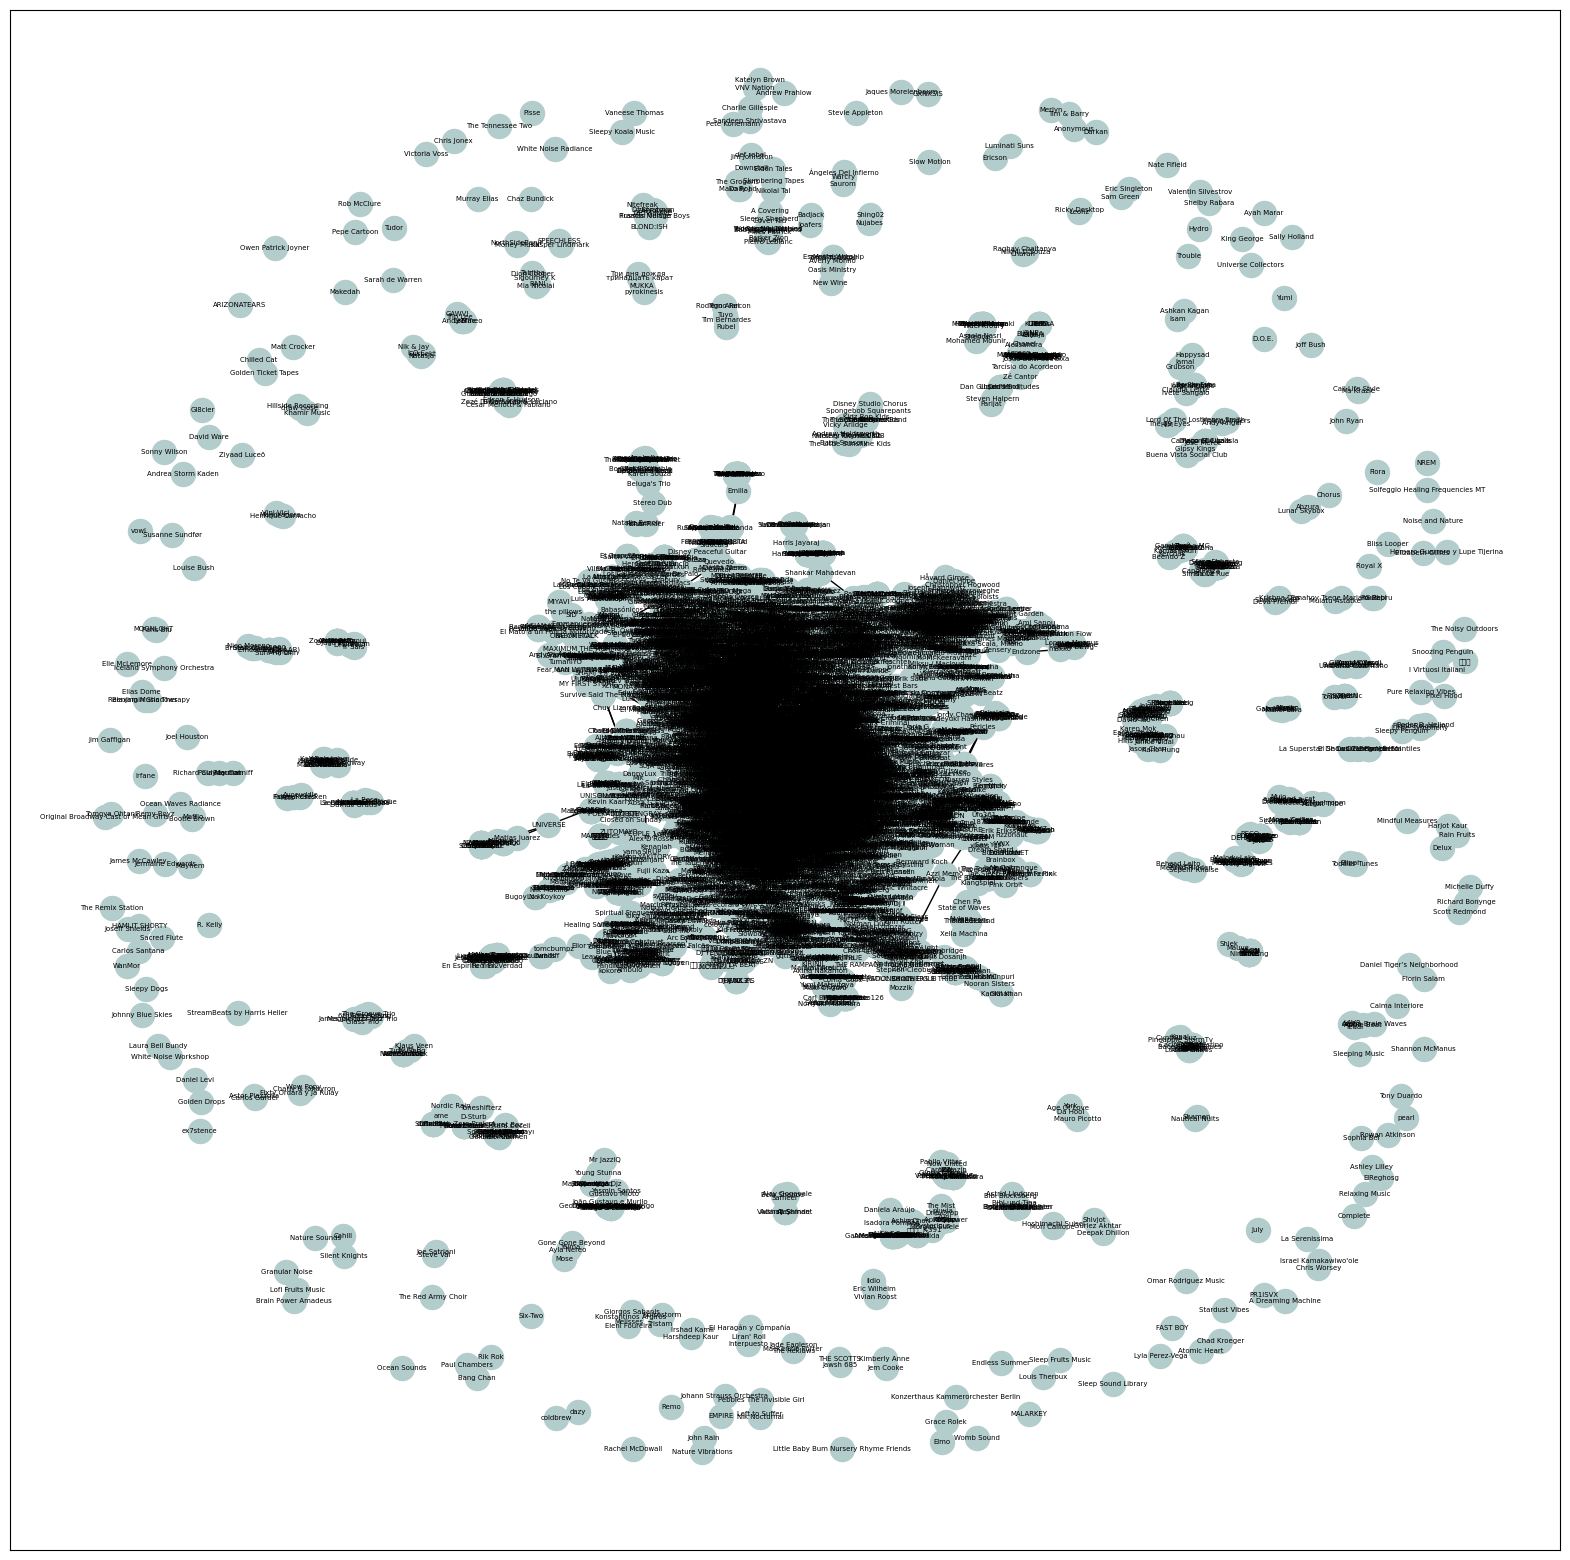

In [21]:
np.random.seed(0)
plt.figure(figsize=(20,20))
nx.draw_networkx(G, with_labels=True, node_color=(.7,.8,.8), font_size=5)